In [ ]:
!pip install tensorflow pandas numpy matplotlib seaborn scikit-learn
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=1f59d46c111636c78d4f44b071ac96bca88c0d919b0ee42613eabcd1a4d16b66
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import xgboost as xgb
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
import geopandas as gpd
import folium
from folium.plugins import HeatMap
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Dataco/dataco.csv'
#file_path = '/content/drive/MyDrive/Dataco/Dataco SPMFDataCo_cleaned.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

  order date (DateOrders)          Sales  Days Delayed   Type  \
0              2015-01-07  232098.824450      0.498308  DEBIT   
1              2015-01-14  242413.194614      0.471369  DEBIT   
2              2015-01-21  235196.184509      0.631491  DEBIT   
3              2015-01-28  238982.384641      0.516049  DEBIT   
4              2015-02-04  230614.734504      0.614417  DEBIT   

   Days for shipping (real)  Customer Id Customer Segment   Category Name  \
0                  3.625212         2826         Consumer          Cleats   
1                  3.626556         1928         Consumer          Cleats   
2                  3.390285        11422         Consumer          Cleats   
3                  3.605761          396         Consumer          Cleats   
4                  3.503772          257         Consumer  Men's Footwear   

  Department Name   Latitude  ...  Order Item Discount Rate Order Item Id  \
0        Fan Shop  18.227573  ...                      0.12          

In [ ]:
print(df.columns)


Index(['order date (DateOrders)', 'Sales', 'Days Delayed', 'Type',
       'Days for shipping (real)', 'Customer Id', 'Customer Segment',
       'Category Name', 'Department Name', 'Latitude', 'Longitude',
       'Order City', 'Order Country', 'Order Id', 'Order Item Discount Rate',
       'Order Item Id', 'Order Item Profit Ratio', 'Order Item Quantity',
       'Sales After Discount', 'Order Profit Per Order', 'Order State',
       'Product Name', 'Product Price', 'Location'],
      dtype='object')


In [ ]:
df.columns

Index(['order date (DateOrders)', 'Sales', 'Days Delayed', 'Type',
       'Days for shipping (real)', 'Customer Id', 'Customer Segment',
       'Category Name', 'Department Name', 'Latitude', 'Longitude',
       'Order City', 'Order Country', 'Order Id', 'Order Item Discount Rate',
       'Order Item Id', 'Order Item Profit Ratio', 'Order Item Quantity',
       'Sales After Discount', 'Order Profit Per Order', 'Order State',
       'Product Name', 'Product Price', 'Location'],
      dtype='object')

In [ ]:
df.shape

(161, 24)

In [ ]:
# Create 'Days Delayed' column
df['Days Delayed'] = df['Days for shipping (real)'] - df['Days for shipment (scheduled)']

# Step 1: Check for max delay to ensure values over 1 day exist
max_delay = df['Days Delayed'].max()
print(f"Maximum delay in dataset: {max_delay} days")


KeyError: 'Days for shipment (scheduled)'

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.3033 - val_loss: 0.2187
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.2667 - val_loss: 0.2159
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.2490 - val_loss: 0.2131
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.2374 - val_loss: 0.2102
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.2307 - val_loss: 0.2073
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.2264 - val_loss: 0.2044
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.2258 - val_loss: 0.2015
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.2188 - val_loss: 0.1985
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.2144 - val_loss: 0.1955
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.2122 - val_loss: 0.1926
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.2060 - val_loss: 0.1897
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 0.2017 - val_loss: 0.1868


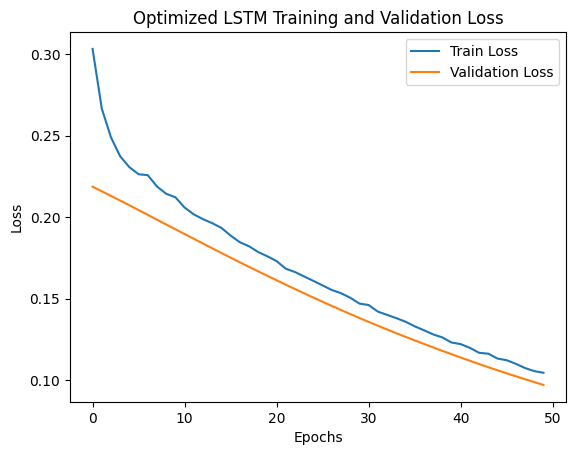

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
Mean Absolute Error (MAE): 4450.678538891106
Root Mean Squared Error (RMSE): 9589.89404742287


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/Dataco/dataco.csv'
df = pd.read_csv(file_path)

# Preprocess data
df['order_date'] = pd.to_datetime(df['order date (DateOrders)'])
df.set_index('order_date', inplace=True)

# Aggregate weekly sales and delays by location
weekly_data = df.groupby([pd.Grouper(freq='W'), 'Order Country', 'Order City']).agg({
    'Sales': 'sum',
    'Days Delayed': 'mean'
}).fillna(0).reset_index()

# Pivot the data to have weekly sales time series for each location
pivot_data = weekly_data.pivot_table(index='order_date', columns=['Order Country', 'Order City'], values='Sales').fillna(0)

# Scale data to [0, 1] range
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(pivot_data)
scaled_data = pd.DataFrame(scaled_data, columns=pivot_data.columns, index=pivot_data.index)

# Prepare data for LSTM model
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

SEQ_LENGTH = 150  # Using 200 weeks for training sequences
X, y = create_sequences(scaled_data.values, SEQ_LENGTH)

# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),
    LSTM(50, return_sequences=False, kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(X_train.shape[2])  # Output size matches the number of features (locations)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Optimized LSTM Training and Validation Loss')
plt.legend()
plt.show()

# Make predictions
predictions = model.predict(X_test)

# Inverse scale predictions and test data
predictions_original_scale = scaler.inverse_transform(predictions)
y_test_original_scale = scaler.inverse_transform(y_test)

# Evaluate the model
mae = np.mean(np.abs(predictions_original_scale - y_test_original_scale))
rmse = np.sqrt(np.mean(np.square(predictions_original_scale - y_test_original_scale)))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


week =155 - use this

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.2909 - val_loss: 0.2186
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - loss: 0.2610 - val_loss: 0.2160
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.2464 - val_loss: 0.2133
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 0.2426 - val_loss: 0.2106
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.2370 - val_loss: 0.2079
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.2279 - val_loss: 0.2051
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.2241 - val_loss: 0.2024
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.2193 - val_loss: 0.1997
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.2140 - val_loss: 0.1969
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.2100 - val_loss: 0.1942
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.2085 - val_loss: 0.1915
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.2047 - val_loss: 0.1888
Epoch 13/50

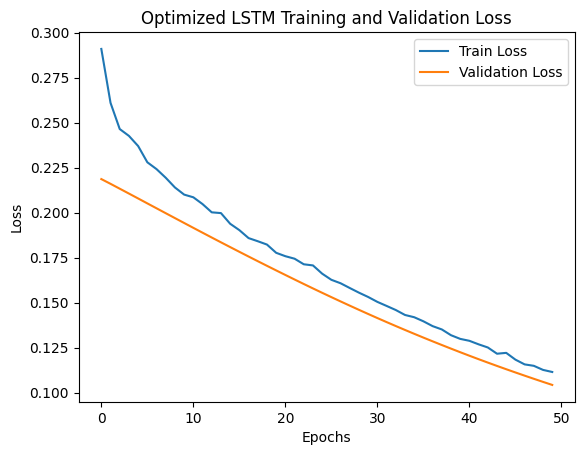

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
Mean Absolute Error (MAE): 3779.0030176778505
Root Mean Squared Error (RMSE): 8754.24306457414


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/Dataco/dataco.csv'
df = pd.read_csv(file_path)

# Preprocess data
df['order_date'] = pd.to_datetime(df['order date (DateOrders)'])
df.set_index('order_date', inplace=True)

# Aggregate weekly sales and delays by location
weekly_data = df.groupby([pd.Grouper(freq='W'), 'Order Country', 'Order City']).agg({
    'Sales': 'sum',
    'Days Delayed': 'mean'
}).fillna(0).reset_index()

# Pivot the data to have weekly sales time series for each location
pivot_data = weekly_data.pivot_table(index='order_date', columns=['Order Country', 'Order City'], values='Sales').fillna(0)

# Scale data to [0, 1] range
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(pivot_data)
scaled_data = pd.DataFrame(scaled_data, columns=pivot_data.columns, index=pivot_data.index)

# Prepare data for LSTM model
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

SEQ_LENGTH = 155  # Using 155 weeks for training sequences
X, y = create_sequences(scaled_data.values, SEQ_LENGTH)

# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),
    LSTM(50, return_sequences=False, kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(X_train.shape[2])  # Output size matches the number of features (locations)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Optimized LSTM Training and Validation Loss')
plt.legend()
plt.show()

# Make predictions
predictions = model.predict(X_test)

# Inverse scale predictions and test data
predictions_original_scale = scaler.inverse_transform(predictions)
y_test_original_scale = scaler.inverse_transform(y_test)

# Evaluate the model
mae = np.mean(np.abs(predictions_original_scale - y_test_original_scale))
rmse = np.sqrt(np.mean(np.square(predictions_original_scale - y_test_original_scale)))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

improved code

Epoch 1/50


Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.3244 - val_loss: 0.2192
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.2738 - val_loss: 0.2169
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 0.2552 - val_loss: 0.2145
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.2495 - val_loss: 0.2121
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.2460 - val_loss: 0.2096
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.2388 - val_loss: 0.2071
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.2294 - val_loss: 0.2046
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 0.2271 - val_loss: 0.2021
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.2193 - val_loss: 0.1997
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 0.2204 - val_loss: 0.1972
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 0.2132 - val_loss: 0.1947
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 0.2118 - val_loss: 0.1922
Epoch 13

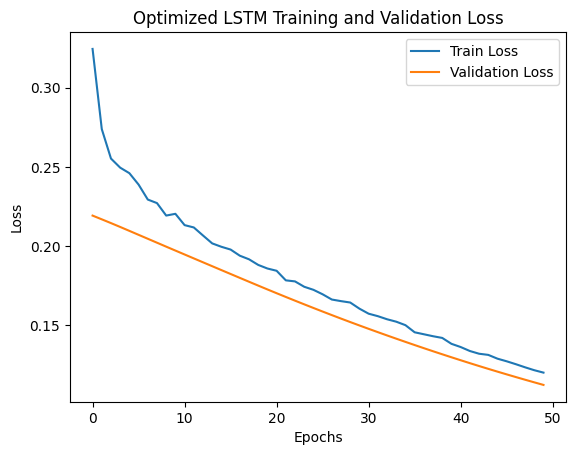

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
Mean Absolute Error (MAE): 3873.4657310187686
Root Mean Squared Error (RMSE): 8935.85004568786
Accuracy: 0.46875
F1 Score: 0.6382978723404256

Classification Report:
              precision    recall  f1-score   support

 High Demand       1.00      0.47      0.64        96
  Low Demand       0.00      0.00      0.00         0

    accuracy                           0.47        96
   macro avg       0.50      0.23      0.32        96
weighted avg       1.00      0.47      0.64        96


Confusion Matrix:
[[ 0  0  0]
 [ 0  0  0]
 [51  0 45]]


Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, f1_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import shap

# Load the dataset
file_path = '/content/drive/MyDrive/Dataco/dataco.csv'
df = pd.read_csv(file_path)

# Preprocess data
df['order_date'] = pd.to_datetime(df['order date (DateOrders)'])
df.set_index('order_date', inplace=True)

# Aggregate weekly sales and delays by location
weekly_data = df.groupby([pd.Grouper(freq='W'), 'Order Country', 'Order City']).agg({
    'Sales': 'sum',
    'Days Delayed': 'mean'
}).fillna(0).reset_index()

# Pivot the data to have weekly sales time series for each location
pivot_data = weekly_data.pivot_table(index='order_date', columns=['Order Country', 'Order City'], values='Sales').fillna(0)

# Scale data to [0, 1] range
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(pivot_data)
scaled_data = pd.DataFrame(scaled_data, columns=pivot_data.columns, index=pivot_data.index)

# Prepare data for LSTM model
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

SEQ_LENGTH = 155  # Using 155 weeks for training sequences
X, y = create_sequences(scaled_data.values, SEQ_LENGTH)

# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),
    LSTM(50, return_sequences=False, kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(X_train.shape[2])  # Output size matches the number of features (locations)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Optimized LSTM Training and Validation Loss')
plt.legend()
plt.show()

# Make predictions
predictions = model.predict(X_test)

# Inverse scale predictions and test data
predictions_original_scale = scaler.inverse_transform(predictions)
y_test_original_scale = scaler.inverse_transform(y_test)

# Evaluate the model
mae = mean_absolute_error(y_test_original_scale, predictions_original_scale)
rmse = np.sqrt(mean_squared_error(y_test_original_scale, predictions_original_scale))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

### PART 2: Demand Volatility Analysis and Categorization ###

# Calculate variance in Sales for demand volatility analysis
geo_volatility = df.groupby('Order Country')['Sales'].std()
high_volatility_countries = geo_volatility[geo_volatility >= geo_volatility.quantile(0.75)].index

df['Geographic Segment (Volatility)'] = df['Order Country'].apply(
    lambda x: 'High Volatility' if x in high_volatility_countries else 'Low Volatility'
)

# Define thresholds for categorizing demand levels
low_threshold = np.percentile(y_test_original_scale, 33)
high_threshold = np.percentile(y_test_original_scale, 66)

# Function to classify demand based on thresholds
def classify_demand(value):
    if value < low_threshold:
        return 'Low Demand'
    elif value < high_threshold:
        return 'Medium Demand'
    else:
        return 'High Demand'

# Apply classification to actual and predicted values
y_test_classified = np.array([classify_demand(val) for val in y_test_original_scale.flatten()])
predictions_classified = np.array([classify_demand(val) for val in predictions_original_scale.flatten()])

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test_classified, predictions_classified)
f1 = f1_score(y_test_classified, predictions_classified, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print("\nClassification Report:")
print(classification_report(y_test_classified, predictions_classified))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test_classified, predictions_classified, labels=["Low Demand", "Medium Demand", "High Demand"])
print("\nConfusion Matrix:")
print(conf_matrix)



SHAP

In [ ]:
df.columns



Index(['order date (DateOrders)', 'Sales', 'Days Delayed', 'Type',
       'Days for shipping (real)', 'Customer Id', 'Customer Segment',
       'Category Name', 'Department Name', 'Latitude', 'Longitude',
       'Order City', 'Order Country', 'Order Id', 'Order Item Discount Rate',
       'Order Item Id', 'Order Item Profit Ratio', 'Order Item Quantity',
       'Sales After Discount', 'Order Profit Per Order', 'Order State',
       'Product Name', 'Product Price', 'Location'],
      dtype='object')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
import shap

# Load the dataset
file_path = '/content/drive/MyDrive/Dataco/dataco.csv'
df = pd.read_csv(file_path)

# Preprocess the data
df['order_date'] = pd.to_datetime(df['order date (DateOrders)'])
df.set_index('order_date', inplace=True)



# Aggregate weekly sales and delays by location
weekly_data = df.groupby([pd.Grouper(freq='W'), 'Order Country', 'Order City']).agg({
    'Sales': 'sum',
    'Days Delayed': 'mean'
}).fillna(0).reset_index()

# Pivot the data to have weekly sales time series for each location
pivot_data = weekly_data.pivot_table(index='order_date', columns=['Order Country', 'Order City'], values='Sales').fillna(0)

# Scale data to [0, 1] range
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(pivot_data)
scaled_data = pd.DataFrame(scaled_data, columns=pivot_data.columns, index=pivot_data.index)


In [ ]:
# Prepare sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

SEQ_LENGTH = 155  # Set sequence length
X, y = create_sequences(scaled_data.values, SEQ_LENGTH)

# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


Epoch 1/50


Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.3111 - val_loss: 0.2176
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.2604 - val_loss: 0.2152
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 0.2607 - val_loss: 0.2127
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.2498 - val_loss: 0.2101
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.2364 - val_loss: 0.2075
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.2280 - val_loss: 0.2049
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.2239 - val_loss: 0.2022
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 0.2177 - val_loss: 0.1996
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.2162 - val_loss: 0.1970
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.2139 - val_loss: 0.1944
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.2077 - val_loss: 0.1919
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.2044 - val_loss: 0.1893
Epoch 13/5

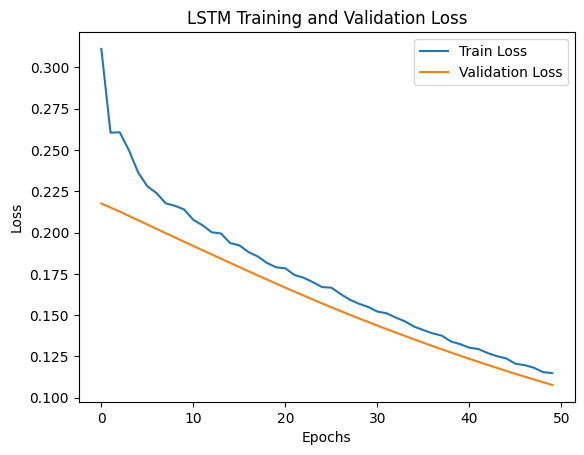

In [ ]:
# Build the LSTM model
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),
    LSTM(50, return_sequences=False, kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(X_train.shape[2])  # Output size matches the number of features (locations)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LSTM Training and Validation Loss')
plt.legend()
plt.show()


In [ ]:
# Make predictions
predictions = model.predict(X_test)

# Inverse scale predictions and test data
predictions_original_scale = scaler.inverse_transform(predictions)
y_test_original_scale = scaler.inverse_transform(y_test)

# Evaluate the model
mae = np.mean(np.abs(predictions_original_scale - y_test_original_scale))
rmse = np.sqrt(np.mean(np.square(predictions_original_scale - y_test_original_scale)))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
Mean Absolute Error (MAE): 4316.438931916145
Root Mean Squared Error (RMSE): 9045.849108209295


In [ ]:
# Check the shape of X_train
print("X_train shape:", X_train.shape)


X_train shape: (4, 155, 48)


In [ ]:
# Flatten X_train for LIME
X_train_flat = X_train.reshape(X_train.shape[0], -1)  # Reshape to 2D


In [ ]:
# Verify feature names length
print("Number of features in feature_names:", len(pivot_data.columns.tolist()))
print("Number of features in X_train_flat:", X_train_flat.shape[1])


Number of features in feature_names: 48
Number of features in X_train_flat: 7440


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
[("['Australia' 'Sydney'] <= 0.00", 0.005300823303623334), ("['Francia' 'Berlín'] <= 0.00", 0.0043618760499990455), ("['Francia' 'Berlín'] <= 0.00", 0.004319320351171633), ("['Francia' 'Berlín'] <= 0.00", 0.0035682762577446897), ("['Francia' 'Berlín'] <= 0.00", 0.0034456164117141826), ("['Australia' 'Sydney'] <= 0.00", 0.003376287784293166), ("['Francia' 'Berlín'] > 0.25", -0.00327246734460741), ("['Australia' 'Brisbane'] <= 0.00", -0.0031077640737592134), ("['Francia' 'Berlín'] <= 0.00", 0.0028726818340724597), ("['Australia' 'Manila'] <= 0.11", -0.002751658492637182)]


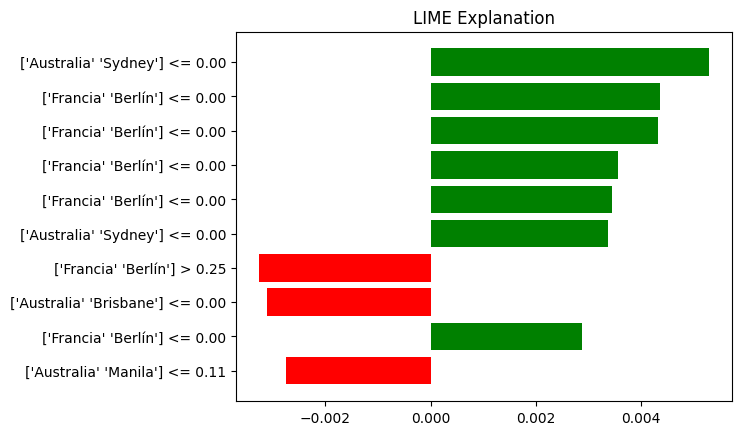

In [ ]:
import numpy as np
import pandas as pd
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt

# Create a helper function to predict with the LSTM model
def predict_fn(x):
    # Reshape input for LSTM
    x_reshaped = x.reshape(-1, SEQ_LENGTH, X_test.shape[2])  # Shape for LSTM
    return model.predict(x_reshaped)

# Create a LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_train.reshape(X_train.shape[0], -1),  # Flatten the training data for LIME
    feature_names=np.array(pivot_data.columns.tolist() * SEQ_LENGTH),  # Adjust based on your features
    mode='regression'
)

# Select an instance from the test set to explain
i = 0  # Index of the instance you want to explain
X_test_sample = X_test[i].reshape(1, SEQ_LENGTH * X_test.shape[2])  # Flatten for LIME

# Generate LIME explanation
exp = explainer.explain_instance(X_test_sample.flatten(), predict_fn, num_features=10)  # Flatten for LIME

# Show the explanation using print instead of show_in_notebook
# This will show the important features and their contributions
print(exp.as_list())  # Display the features and their SHAP values

# Optionally visualize the explanation
fig = exp.as_pyplot_figure()
plt.title("LIME Explanation")
plt.show()


changes for xai

In [ ]:
# Load the dataset
file_path = '/content/drive/MyDrive/Dataco/dataco.csv'
df = pd.read_csv(file_path)

# Preprocess
df['order_date'] = pd.to_datetime(df['order date (DateOrders)'])
#df['Days Delayed'] = df['Days for shipping (real)'] - df['Days for shipment (scheduled)']

# One-hot encode categorical features
df = pd.get_dummies(df, columns=['Order City', 'Order Country', 'Category Name', 'Customer Segment'])

# Select relevant features for the LSTM model
feature_columns = ['Sales', 'Days Delayed', 'Days for shipping (real)'] + list(df.columns[df.columns.str.contains('Order City_')]) + list(df.columns[df.columns.str.contains('Order Country_')])

# Create the feature matrix
X = df[feature_columns].values
y = df['Sales'].values  # Assuming you're predicting Sales

# Reshape for LSTM input
X_reshaped = X.reshape((X.shape[0], 1, X.shape[1]))  # Reshape for LSTM input


X_train shape: (128, 1, 55)
y_train shape: (128,)
X_test shape: (33, 1, 55)
y_test shape: (33,)
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 53467328512.0000 - val_loss: 54017069056.0000
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 54261477376.0000 - val_loss: 54017060864.0000
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 56889974784.0000 - val_loss: 54017060864.0000
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 54856511488.0000 - val_loss: 54017069056.0000
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 54390980608.0000 - val_loss: 54017163264.0000
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 55345242112.0000 - val_loss: 54017196032.0000
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 56856182784.0000 - val_loss: 54017196032.0000
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 54263582720.0000 - val_loss: 54017241088.0000
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 54243725312.0000 - val

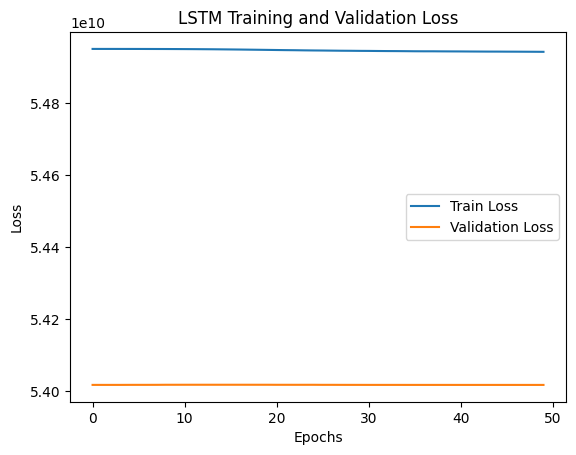

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
Mean Absolute Error (MAE): 229900.890625
Root Mean Squared Error (RMSE): 232415.5625


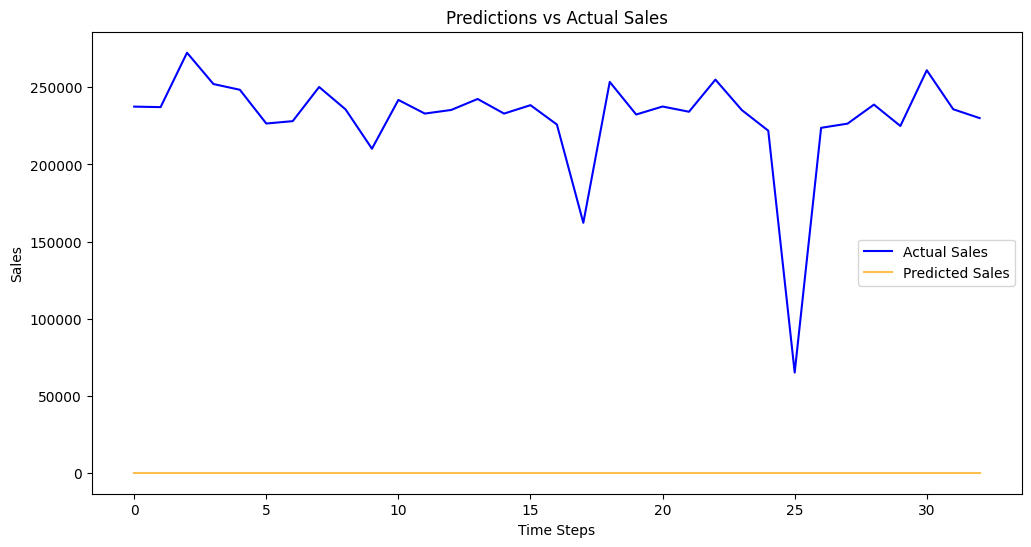

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Input
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/Dataco/dataco.csv'
df = pd.read_csv(file_path)

# Preprocess the data
df['order_date'] = pd.to_datetime(df['order date (DateOrders)'])
#df['Days Delayed'] = df['Days for shipping (real)'] - df['Days for shipment (scheduled)']

# One-hot encode categorical features
df = pd.get_dummies(df, columns=['Order City', 'Order Country', 'Category Name', 'Customer Segment'])

# Select relevant features for the LSTM model
feature_columns = ['Sales', 'Days Delayed', 'Days for shipping (real)'] + \
                  list(df.columns[df.columns.str.contains('Order City_')]) + \
                  list(df.columns[df.columns.str.contains('Order Country_')])

# Create the feature matrix and target variable
X = df[feature_columns].values
y = df['Sales'].values  # Assuming you're predicting Sales

# Check for NaN values and data types
#if np.any(np.isnan(X)) or np.any(np.isnan(y)):
    #print("There are NaN values in the dataset. Please handle them before proceeding.")

# Convert to float32
X = X.astype(np.float32)
y = y.astype(np.float32)

# Reshape for LSTM input
X_reshaped = X.reshape((X.shape[0], 1, X.shape[1]))  # Reshape for LSTM input

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# Print shapes for debugging
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Build the LSTM model
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),  # Specify input shape correctly
    LSTM(100, return_sequences=True, kernel_regularizer='l2'),
    BatchNormalization(),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)  # Output layer predicting Sales
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LSTM Training and Validation Loss')
plt.legend()
plt.show()

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mae = np.mean(np.abs(predictions.flatten() - y_test))
rmse = np.sqrt(np.mean(np.square(predictions.flatten() - y_test)))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Visualize predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Sales', color='blue')
plt.plot(predictions.flatten(), label='Predicted Sales', color='orange', alpha=0.7)
plt.xlabel('Time Steps')
plt.ylabel('Sales')
plt.title('Predictions vs Actual Sales')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load and preprocess the data
# Assuming `df` is your DataFrame with the listed columns
df['order_date'] = pd.to_datetime(df['order date (DateOrders)'])
df.set_index('order_date', inplace=True)

# Aggregate data by week for each region (Latitude, Longitude, Order City)
weekly_data = df.groupby([pd.Grouper(freq='W'), 'Latitude', 'Longitude', 'Order City']).agg({
    'Sales': 'sum',
    'Days Delayed': 'mean',
    'Days for shipping (real)': 'mean'
}).reset_index()

# Pivot to create a time series per region
pivot_data = weekly_data.pivot_table(index='order_date', columns=['Latitude', 'Longitude', 'Order City'], values='Sales').fillna(0)

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(pivot_data)

# Prepare sequences for LSTM model
def create_sequences(data, seq_length=4):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Sequence length of 4 weeks (1 month)
X, y = create_sequences(scaled_data, seq_length=4)

# Reshape for LSTM input
X = X.reshape((X.shape[0], X.shape[1], X.shape[2]))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - loss: 0.0061 - val_loss: 0.0067
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0061 - val_loss: 0.0067
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0061 - val_loss: 0.0067
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0061 - val_loss: 0.0067
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0061 - val_loss: 0.0067
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0061 - val_loss: 0.0067
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0061 - val_loss: 0.0067
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0061 - val_loss: 0.0067
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0061 - val_loss: 0.0067
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0061 - val_loss: 0.0067
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0061 - val_loss: 0.0067
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0061 - val_loss: 0.0067


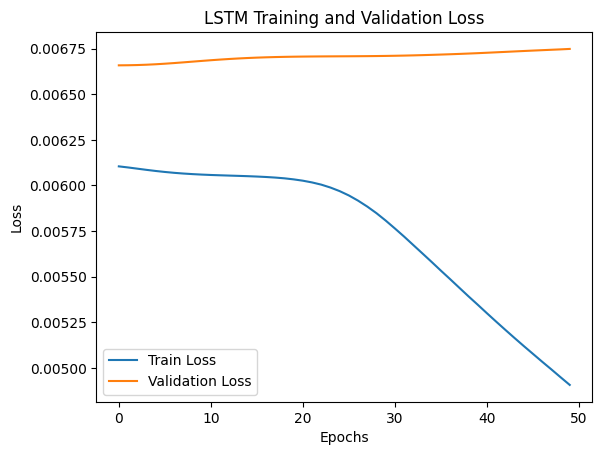

In [ ]:
# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50),
    Dense(X_train.shape[2])  # Output size is the number of locations (features)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Plot training loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LSTM Training and Validation Loss')
plt.legend()
plt.show()



In [ ]:
# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Inverse scaling for interpretability
y_test = scaler.inverse_transform(y_test)

# Evaluate model accuracy
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Identify potential warehouse locations based on high demand and high delay areas
high_demand_regions = df.groupby(['Latitude', 'Longitude', 'Order City']).agg({
    'Sales': 'sum',
    'Days Delayed': 'mean'
}).reset_index()

# Filter regions with high demand and delays
potential_warehouse_locations = high_demand_regions[(high_demand_regions['Sales'] > high_demand_regions['Sales'].quantile(0.75)) &
                                                    (high_demand_regions['Days Delayed'] > high_demand_regions['Days Delayed'].quantile(0.75))]

print("Potential Warehouse Locations:\n", potential_warehouse_locations)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
Mean Absolute Error (MAE): 4836.301913139877
Root Mean Squared Error (RMSE): 18091.330405533412
Potential Warehouse Locations:
       Latitude  Longitude Order City          Sales  Days Delayed
8    18.225828 -66.370560   Estambul  248447.644951      0.614430
42   18.380119 -66.370514     Zanyán  253542.405131      0.646538
68   32.713036 -66.370537   Hamburgo  261106.515304      0.645733
76   33.046471 -66.370575     Berlín  256794.343517      0.625418
77   33.046471 -66.370567      Lagos  248208.874684      0.726758
79   33.144863 -66.370560      Viena  246514.054858      0.624406
89   33.863297 -66.370506      Lagos  254274.504976      0.631083
92   34.000626 -66.370613  Estocolmo  251088.564556      0.777778
116  38.118618 -66.370506     London  246817.484987      0.636881


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - loss: 0.2568 - val_loss: 0.2400
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2354 - val_loss: 0.2196
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2152 - val_loss: 0.2005
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1964 - val_loss: 0.1828
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1789 - val_loss: 0.1664
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1628 - val_loss: 0.1513
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1480 - val_loss: 0.1374
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1344 - val_loss: 0.1247
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1219 - val_loss: 0.1131
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1106 - val_loss: 0.1025
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1002 - val_loss: 0.0929
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0908 - val_loss: 0.0841
Epoch 13/50

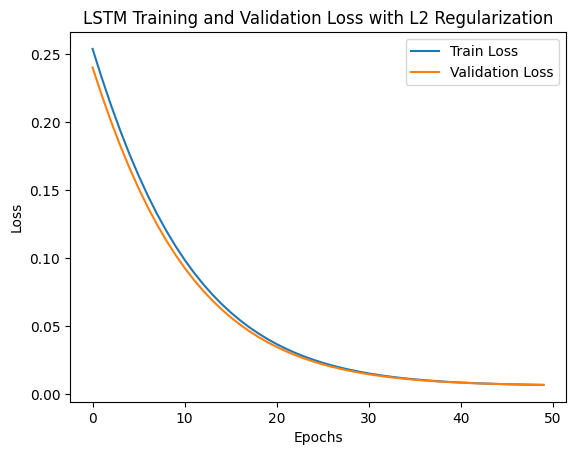

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Assuming weekly_demand_pivot data is already prepared

# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define LSTM model with L2 regularization
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=l2(0.001)),
    LSTM(50, kernel_regularizer=l2(0.001)),
    Dense(X_train.shape[2])  # Output size is the number of locations (features)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LSTM Training and Validation Loss with L2 Regularization')
plt.legend()
plt.show()


Change here - Mei Teng

In [ ]:
# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Inverse scaling for interpretability
y_test = scaler.inverse_transform(y_test)

# Evaluate model accuracy
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Identify potential warehouse locations based on high demand and high delay areas
high_demand_regions = df.groupby(['Latitude', 'Longitude', 'Order City']).agg({
    'Sales': 'sum',
    'Days Delayed': 'mean'
}).reset_index()

# Filter regions with high demand and delays
potential_warehouse_locations = high_demand_regions[(high_demand_regions['Sales'] > high_demand_regions['Sales'].quantile(0.75)) &
                                                    (high_demand_regions['Days Delayed'] > high_demand_regions['Days Delayed'].quantile(0.75))]

print("Potential Warehouse Locations:\n", potential_warehouse_locations)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
Mean Absolute Error (MAE): 2677.2883696996596
Root Mean Squared Error (RMSE): 17472.335622518414
Potential Warehouse Locations:
       Latitude  Longitude Order City          Sales  Days Delayed
8    18.225828 -66.370560   Estambul  248447.644951      0.614430
42   18.380119 -66.370514     Zanyán  253542.405131      0.646538
68   32.713036 -66.370537   Hamburgo  261106.515304      0.645733
76   33.046471 -66.370575     Berlín  256794.343517      0.625418
77   33.046471 -66.370567      Lagos  248208.874684      0.726758
79   33.144863 -66.370560      Viena  246514.054858      0.624406
89   33.863297 -66.370506      Lagos  254274.504976      0.631083
92   34.000626 -66.370613  Estocolmo  251088.564556      0.777778
116  38.118618 -66.370506     London  246817.484987      0.636881


Added Cross Fold Validation

In [ ]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.regularizers import l2

# Set parameters
SEQ_LENGTH = 4  # Number of time steps in each sequence (e.g., 4 weeks)
NUM_SPLITS = 3  # Number of splits for cross-validation

# Define a function to create the LSTM model
def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape, kernel_regularizer=l2(0.001)),
        LSTM(50, kernel_regularizer=l2(0.001)),
        Dense(input_shape[1])  # Output size is the number of locations/features
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Prepare the data for LSTM: Convert time series data into sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Transform data for LSTM input
X, y = create_sequences(scaled_data, SEQ_LENGTH)

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=NUM_SPLITS)

# To store cross-validation results
mae_scores = []
rmse_scores = []

# Cross-validation loop
for train_index, test_index in tscv.split(X):
    # Split into train and test sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create and train LSTM model
    model = create_lstm_model(input_shape=(X_train.shape[1], X_train.shape[2]))
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)

    # Make predictions
    predictions = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))

    # Store results
    mae_scores.append(mae)
    rmse_scores.append(rmse)

    # Print results for this fold
    print(f"MAE: {mae}, RMSE: {rmse}")

# Calculate and print average scores
print(f"Average MAE across folds: {np.mean(mae_scores)}")
print(f"Average RMSE across folds: {np.mean(rmse_scores)}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
MAE: 0.012626597931896714, RMSE: 0.07977503023671625


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


MAE: 0.012435401591721067, RMSE: 0.07930235528660777
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
MAE: 0.012422978449625048, RMSE: 0.07914065542478861
Average MAE across folds: 0.01249499265774761
Average RMSE across folds: 0.07940601364937087


In [ ]:
# Assuming predictions and y_test are arrays with scaled values
predictions_original_scale = scaler.inverse_transform(predictions)
y_test_original_scale = scaler.inverse_transform(y_test)

# Calculate MAE and RMSE on the original scale
mae_original = np.mean(np.abs(predictions_original_scale - y_test_original_scale))
rmse_original = np.sqrt(np.mean(np.square(predictions_original_scale - y_test_original_scale)))

print(f"MAE on original scale: {mae_original}")
print(f"RMSE on original scale: {rmse_original}")


MAE on original scale: 2729.6349071552377
RMSE on original scale: 17815.814078397954


Added Scaling consistency

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.0062 - val_loss: 0.0062
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0062 - val_loss: 0.0063
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0062 - val_loss: 0.0063
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0061 - val_loss: 0.0063
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0061 - val_loss: 0.0063
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0061 - val_loss: 0.0063
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0061 - val_loss: 0.0063
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0061 - val_loss: 0.0063
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0060 - val_loss: 0.0063
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0060 - val_loss: 0.0063
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0060 - val_loss: 0.0063
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0060 - val_loss: 0.0063
Epoch 13/50


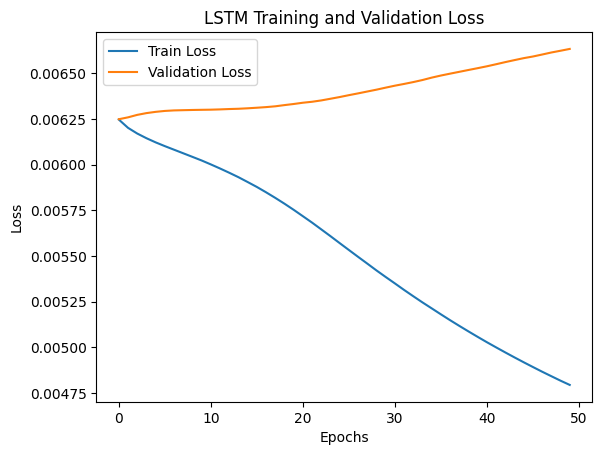

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
Mean Absolute Error (MAE) on original scale: 4718.07287557538
Root Mean Squared Error (RMSE) on original scale: 18045.699111836202


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load and preprocess the data
df['order_date'] = pd.to_datetime(df['order date (DateOrders)'])
df.set_index('order_date', inplace=True)

# Aggregate data by week for each region (Latitude, Longitude, Order City)
weekly_data = df.groupby([pd.Grouper(freq='W'), 'Latitude', 'Longitude', 'Order City']).agg({
    'Sales': 'sum',
    'Days Delayed': 'mean',
    'Days for shipping (real)': 'mean'
}).reset_index()

# Pivot to create a time series per region
pivot_data = weekly_data.pivot_table(index='order_date', columns=['Latitude', 'Longitude', 'Order City'], values='Sales').fillna(0)

# Initialize scaler and fit on the entire dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(pivot_data)
scaled_data = pd.DataFrame(scaled_data, columns=pivot_data.columns, index=pivot_data.index)

# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Define sequence length (e.g., 4 weeks)
SEQ_LENGTH = 4
X, y = create_sequences(scaled_data.values, SEQ_LENGTH)

# Split into training and testing sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50),
    Dense(X_train.shape[2])  # Output shape matches the number of regions (columns)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LSTM Training and Validation Loss')
plt.legend()
plt.show()

# Make predictions
predictions = model.predict(X_test)

# Inverse transform predictions and test data for consistency
predictions_original_scale = scaler.inverse_transform(predictions)
y_test_original_scale = scaler.inverse_transform(y_test)

# Calculate MAE and RMSE on the original scale
mae = np.mean(np.abs(predictions_original_scale - y_test_original_scale))
rmse = np.sqrt(np.mean(np.square(predictions_original_scale - y_test_original_scale)))

print(f"Mean Absolute Error (MAE) on original scale: {mae}")
print(f"Root Mean Squared Error (RMSE) on original scale: {rmse}")


New added changes after feedback

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
Average MAE: 2889.25163777406
Average RMSE: 18504.33513791779


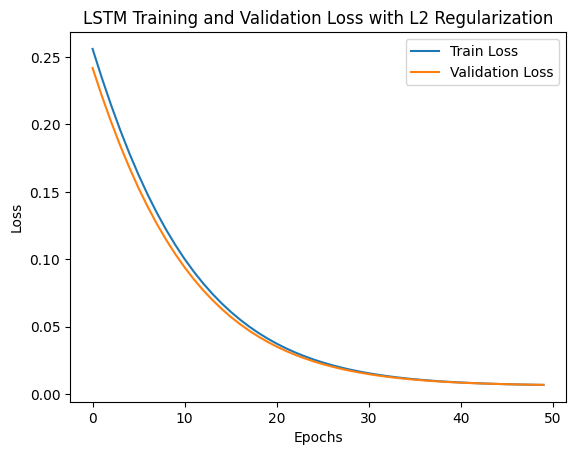

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/Dataco/dataco.csv'
df = pd.read_csv(file_path)

# Convert the order date to datetime and set as index
df['order_date'] = pd.to_datetime(df['order date (DateOrders)'])
df.set_index('order_date', inplace=True)

# Aggregate data by week for each region
weekly_data = df.groupby([pd.Grouper(freq='W'), 'Latitude', 'Longitude', 'Order City']).agg({
    'Sales': 'sum',
    'Days Delayed': 'mean',
    'Days for shipping (real)': 'mean'
}).reset_index()

# Pivot to create a time series per region
pivot_data = weekly_data.pivot_table(index='order_date', columns=['Latitude', 'Longitude', 'Order City'], values='Sales').fillna(0)

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(pivot_data)
scaled_data = pd.DataFrame(scaled_data, columns=pivot_data.columns, index=pivot_data.index)

# Create sequences for the LSTM model
def create_sequences(data, seq_length=4):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Define sequence length and create LSTM inputs
SEQ_LENGTH = 4
X, y = create_sequences(scaled_data.values, SEQ_LENGTH)

# Cross-validation setup
NUM_SPLITS = 3
tscv = TimeSeriesSplit(n_splits=NUM_SPLITS)

mae_scores, rmse_scores = [], []

# LSTM model with cross-validation
def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape, kernel_regularizer=l2(0.001)),
        LSTM(50, kernel_regularizer=l2(0.001)),
        Dense(input_shape[1])
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Run cross-validation
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = create_lstm_model((X_train.shape[1], X_train.shape[2]))
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)

    # Make predictions
    predictions = model.predict(X_test)

    # Inverse scale
    predictions_original = scaler.inverse_transform(predictions)
    y_test_original = scaler.inverse_transform(y_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test_original, predictions_original)
    rmse = np.sqrt(mean_squared_error(y_test_original, predictions_original))

    mae_scores.append(mae)
    rmse_scores.append(rmse)

# Output the average cross-validation metrics
print(f"Average MAE: {np.mean(mae_scores)}")
print(f"Average RMSE: {np.mean(rmse_scores)}")

# Plot Training and Validation Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LSTM Training and Validation Loss with L2 Regularization')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
file_path = '/content/drive/MyDrive/Dataco/dataco.csv'
df = pd.read_csv(file_path)

# Convert order date to datetime
df['order_date'] = pd.to_datetime(df['order date (DateOrders)'])
df.set_index('order_date', inplace=True)

# Identify high-demand regions with minimal delays
top_regions = df.groupby(['Order Country', 'Order City']).agg({
    'Sales': 'sum',
    'Days Delayed': 'mean'
}).sort_values(by='Sales', ascending=False)

# Filter top regions with delays less than 1 day
top_regions_min_delay = top_regions[top_regions['Days Delayed'] < 1]
print("Top high-demand regions with <1 day delay:\n", top_regions_min_delay)

# Highlight problematic routes with delays > 1 day
problematic_routes = df[df['Days Delayed'] > 1].groupby(['Order State', 'Order City']).agg({
    'Sales': 'sum',
    'Days Delayed': 'mean'
}).sort_values(by='Days Delayed', ascending=False)

print("Problematic shipping routes:\n", problematic_routes.head(10))

# Geographic segmentation based on demand volatility
# Calculate sales volatility by region
geo_volatility = df.groupby('Order Country')['Sales After Discount'].std()

# Define high-volatility regions (top 25% of standard deviation in sales after discount)
high_volatility_countries = geo_volatility[geo_volatility >= geo_volatility.quantile(0.75)].index

# Label regions by volatility level
df['Geographic Segment (Volatility)'] = df['Order Country'].apply(
    lambda x: 'High Volatility' if x in high_volatility_countries else 'Low Volatility'
)

# Segment high volatility regions for focused inventory forecasting
high_volatility_data = df[df['Geographic Segment (Volatility)'] == 'High Volatility']

# Analysis on volatility trends post-October 2015
post_oct_2017 = high_volatility_data[high_volatility_data.index > '2015-01-01']

# Analyze regions with sales decline
sales_trends = post_oct_2017.groupby(['Order Country', 'Product Name']).agg({
    'Sales After Discount': 'sum'
}).sort_values(by='Sales After Discount', ascending=True)

print("Regions with sales decline post-October 2015:\n", sales_trends.head(10))

# Scale data for further modeling, if needed
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_sales_data = scaler.fit_transform(df[['Sales', 'Sales After Discount']])

# Add results back to DataFrame if further segmentation or forecasting required
df[['Scaled Sales', 'Scaled Sales After Discount']] = scaled_sales_data


Top high-demand regions with <1 day delay:
                                              Sales  Days Delayed
Order Country  Order City                                       
México         Santo Domingo          4.572674e+06      0.545357
Estados Unidos New York City          3.056939e+06      0.579915
Francia        Berlín                 2.601169e+06      0.575947
Australia      Manila                 2.265273e+06      0.561977
Francia        London                 1.956143e+06      0.591779
México         Managua                1.684663e+06      0.550508
Turquía        Lagos                  1.641321e+06      0.552352
Estados Unidos Los Angeles            1.621555e+06      0.574640
Francia        Madrid                 1.502739e+06      0.548237
Australia      Bangkok                9.961255e+05      0.564546
Turquía        Estambul               9.705512e+05      0.580464
Australia      Yakarta                9.296578e+05      0.536245
México         Tegucigalpa            7.319438

In [ ]:
print(df.columns)


Index(['order date (DateOrders)', 'Sales', 'Days Delayed', 'Type',
       'Days for shipping (real)', 'Customer Id', 'Customer Segment',
       'Category Name', 'Department Name', 'Latitude', 'Longitude',
       'Order City', 'Order Country', 'Order Id', 'Order Item Discount Rate',
       'Order Item Id', 'Order Item Profit Ratio', 'Order Item Quantity',
       'Sales After Discount', 'Order Profit Per Order', 'Order State',
       'Product Name', 'Product Price', 'Location'],
      dtype='object')


medium demand

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/Dataco/dataco.csv'
df = pd.read_csv(file_path)

# Convert order date to datetime format
df['order_date'] = pd.to_datetime(df['order date (DateOrders)'])
df.set_index('order_date', inplace=True)

# Set adjusted sales thresholds for a potentially broader medium-demand range (20th to 80th percentiles)
lower_threshold = df['Sales'].quantile(0.20)
upper_threshold = df['Sales'].quantile(0.80)

# Filter for medium-demand regions and delayed routes (over 0.5 day delay as a new threshold)
medium_demand_delayed_routes = df.groupby(['Order Country', 'Order City']).agg({
    'Sales': 'sum',
    'Days Delayed': 'mean'
}).reset_index()

medium_demand_delayed_routes = medium_demand_delayed_routes[
    (medium_demand_delayed_routes['Sales'] >= lower_threshold) &
    (medium_demand_delayed_routes['Sales'] <= upper_threshold) &
    (medium_demand_delayed_routes['Days Delayed'] > 0.5)
]

# Display the updated medium-demand regions with delayed shipping
print("Updated medium-demand regions with delayed shipping routes (>0.5 day delay):")
print(medium_demand_delayed_routes)


Updated medium-demand regions with delayed shipping routes (>0.5 day delay):
     Order Country    Order City          Sales  Days Delayed
1         Alemania        London  246817.484987      0.636881
16  Estados Unidos  Philadelphia  237341.564629      0.554806
18         Francia      Bordeaux  229352.284442      0.566440
26       Indonesia        Manila  231829.354695      0.591260
27          México  Buenos Aires  231412.624760      0.635767
28          México        Juárez  246904.724753      0.605839
32          México         Mixco  230614.734504      0.614417
33          México   Panama City  227547.514422      0.585763
44         Turquía      Kinshasa  237513.874751      0.508251


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/Dataco/dataco.csv'
df = pd.read_csv(file_path)

# Convert order date to datetime format
df['order_date'] = pd.to_datetime(df['order date (DateOrders)'])
df.set_index('order_date', inplace=True)

# Set thresholds for medium-demand (20th to 80th percentiles)
lower_threshold = df['Sales'].quantile(0.20)
upper_threshold = df['Sales'].quantile(0.80)

# Filter for medium-demand regions and delayed routes
medium_demand_delayed_routes = df.groupby(['Order Country', 'Order City']).agg({
    'Sales': 'sum',
    'Days Delayed': 'mean'
}).reset_index()

# Filter medium demand regions with significant delays (>0.5 days)
medium_demand_delayed_routes = medium_demand_delayed_routes[
    (medium_demand_delayed_routes['Sales'] >= lower_threshold) &
    (medium_demand_delayed_routes['Sales'] <= upper_threshold) &
    (medium_demand_delayed_routes['Days Delayed'] > 1)
]

# Sort by 'Days Delayed' in descending order to show the most delayed regions
medium_demand_delayed_routes = medium_demand_delayed_routes.sort_values(by='Days Delayed', ascending=False)

# Display the regions with the highest delays
print("Medium-demand regions with the most delayed shipping routes:")
print(medium_demand_delayed_routes)


Medium-demand regions with the most delayed shipping routes:
Empty DataFrame
Columns: [Order Country, Order City, Sales, Days Delayed]
Index: []
